# Avocado Price prediction

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,classification_report
import warnings

warnings.filterwarnings('ignore')

In [4]:
dfc=pd.read_csv('/Users/divyasandiman/Downloads/avocado.csv')

In [5]:
dfc

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


1) The dataset 14 columns and 18249 rows. Date,type and region columns are categorical and rest are numerical columns.

In [12]:
dfc.drop('Unnamed: 0',axis=1,inplace=True)
#Dropping the Unnamed: 0 column 

In [13]:
dfc

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [14]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


There are no null values in the dataset

In [15]:
dfc.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [256]:
dfc['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

There are 54 unique values in region

In [17]:
dfc.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [27]:
dfc['Date'] = pd.to_datetime(dfc['Date'])

dfc['Year'] = dfc['Date'].dt.year
dfc['Month'] = dfc['Date'].dt.month
dfc['Day'] = dfc['Date'].dt.day

Changed the Date column from object type to datetime and then extracted 3 seperate columns for year,month and day

In [28]:
dfc

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2018,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,2018,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,2018,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,2018,1,14


In [29]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  Year          18249 non-null  int64         
 14  Month         18249 non-null  int64         
 15  Day           18249 non-null  int64 

In [30]:
dfc.drop('Date',axis=1,inplace=True)
#Drooping the Date column as its are already extracted into year,month and day columns and we nolonger need it.

In [34]:
dfc.drop('Year',axis=1,inplace=True)
# Dropping the 'Year' column as it has the same data as the 'year' column extracted from Date column.

In [70]:
dfc.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


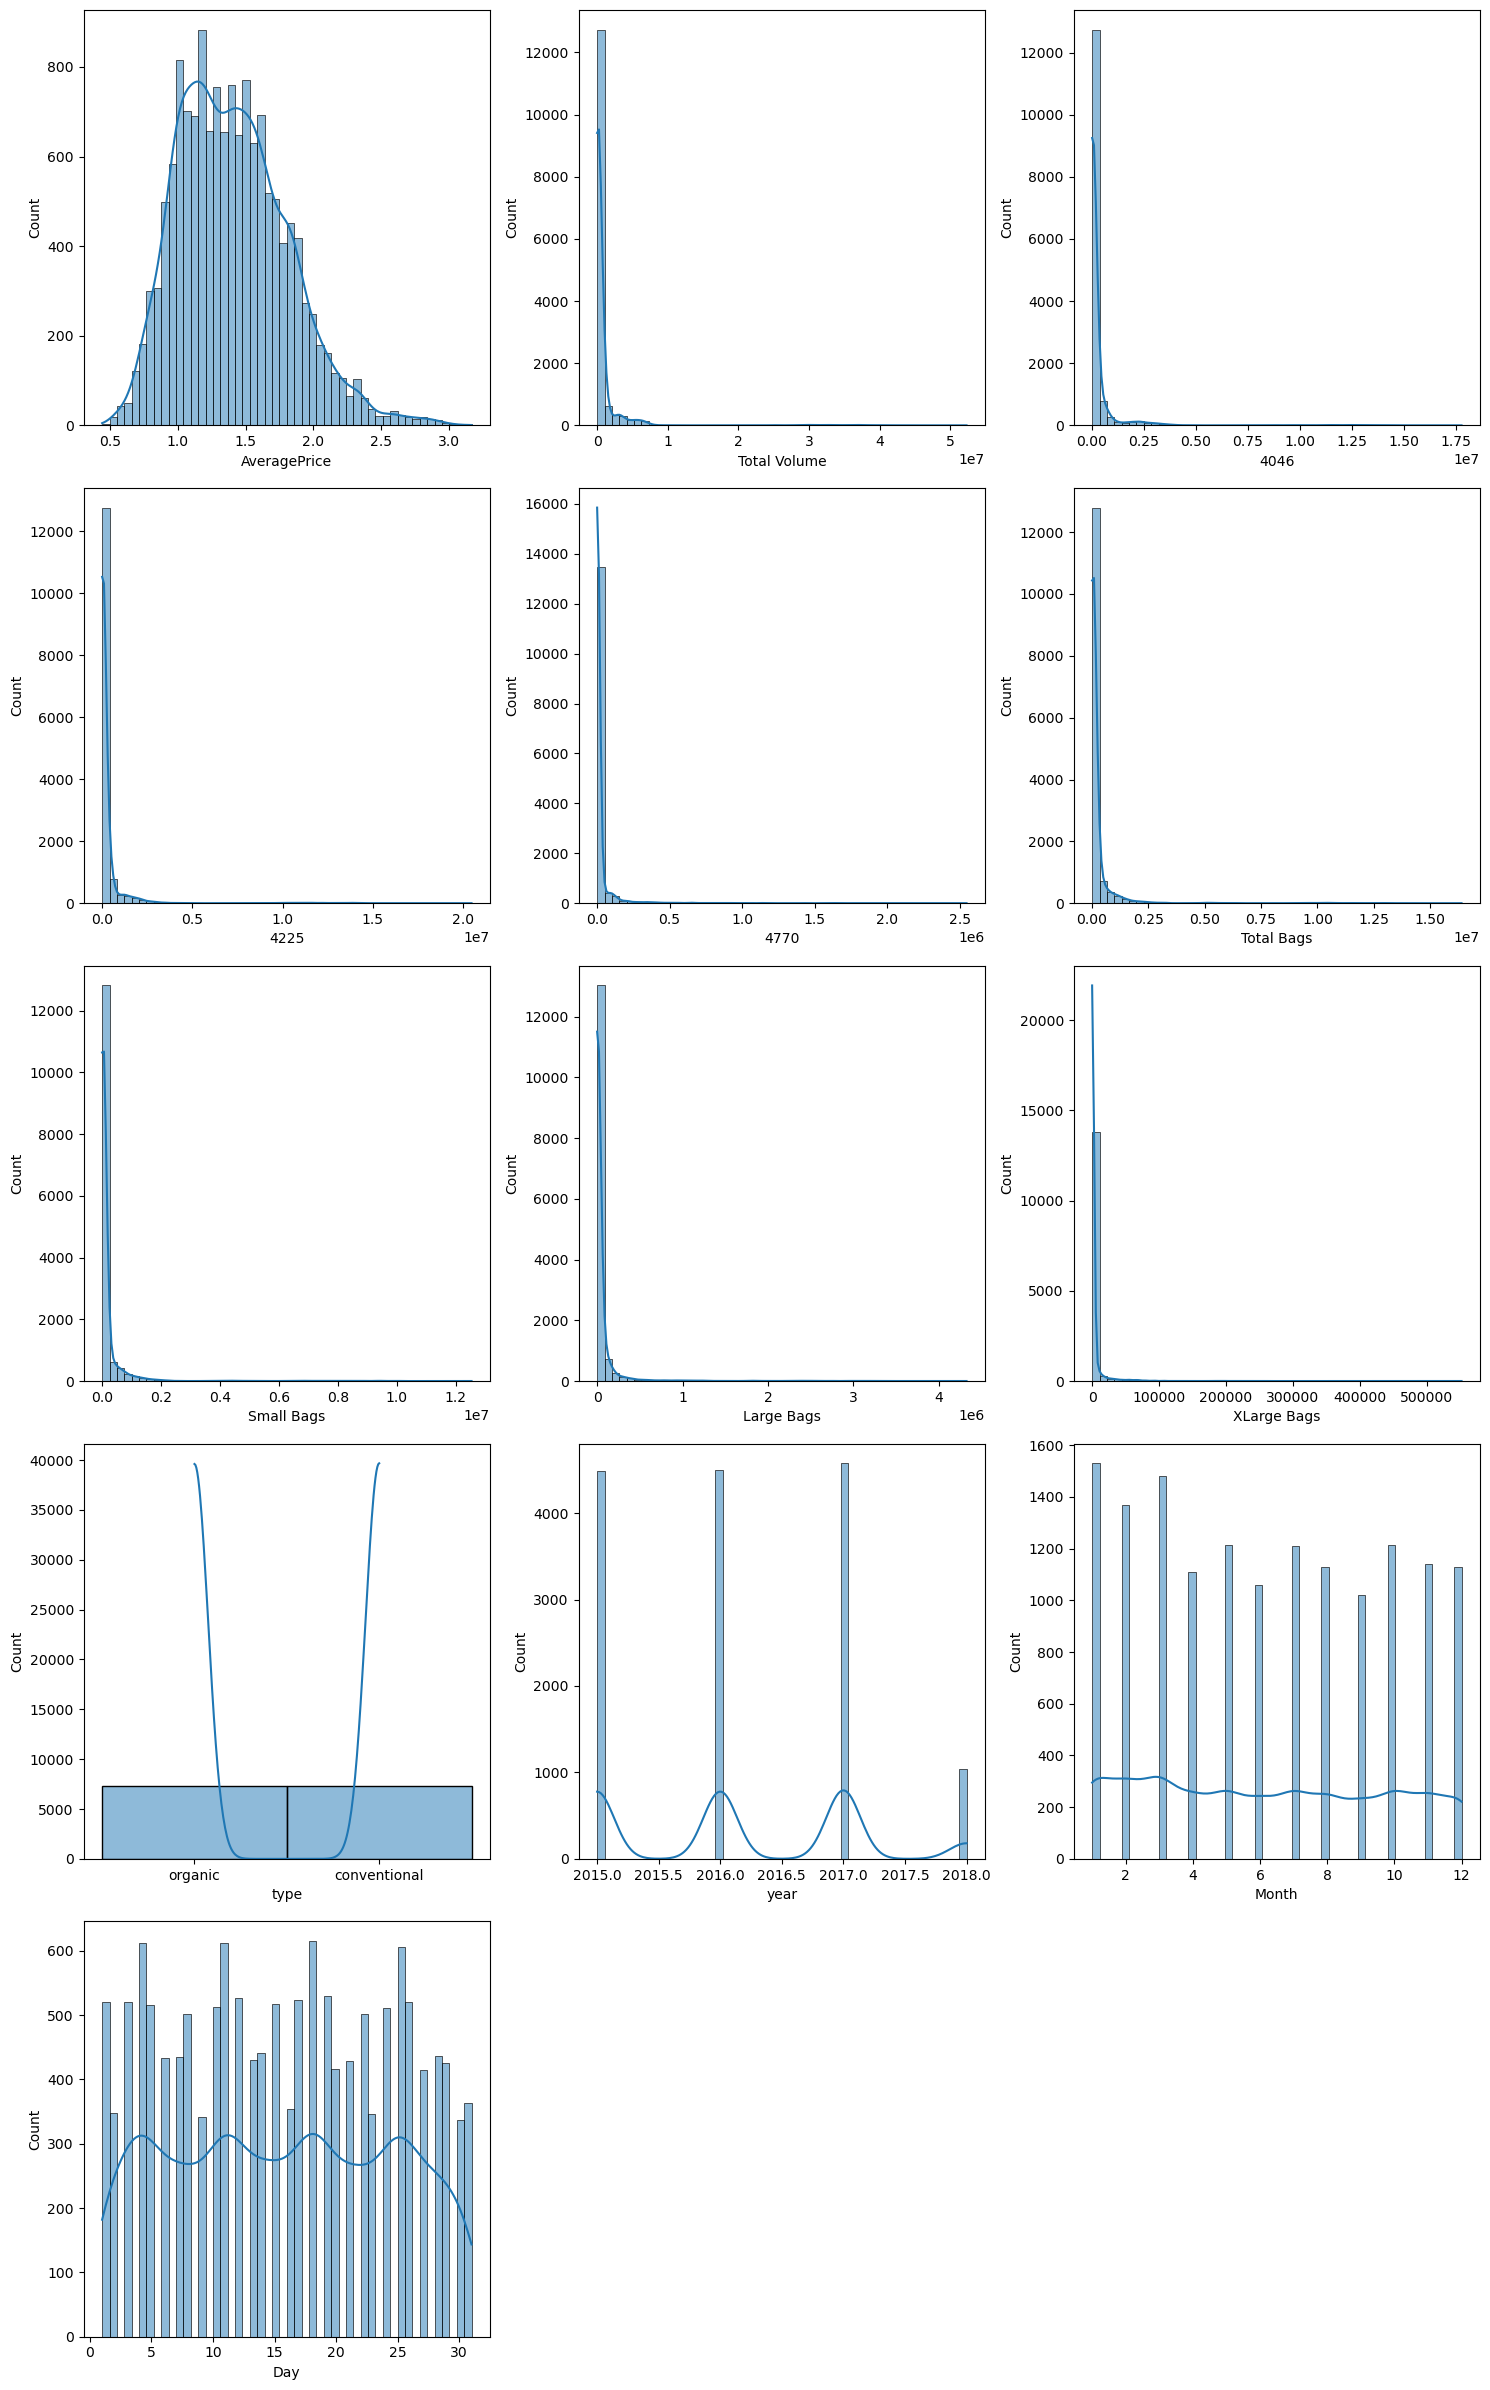

In [71]:
plt.figure(figsize=(15,24))
for num,i in enumerate(x_train.columns):
    plt.subplot(5,3,num+1)
    sns.histplot(x=i,data=x_train,kde=True,bins=50)
    plt.xlabel(i)
plt.tight_layout()
plt.show()

#### Most of the numerical columns are right skewed. Only Average price and Type shows a normal distribution

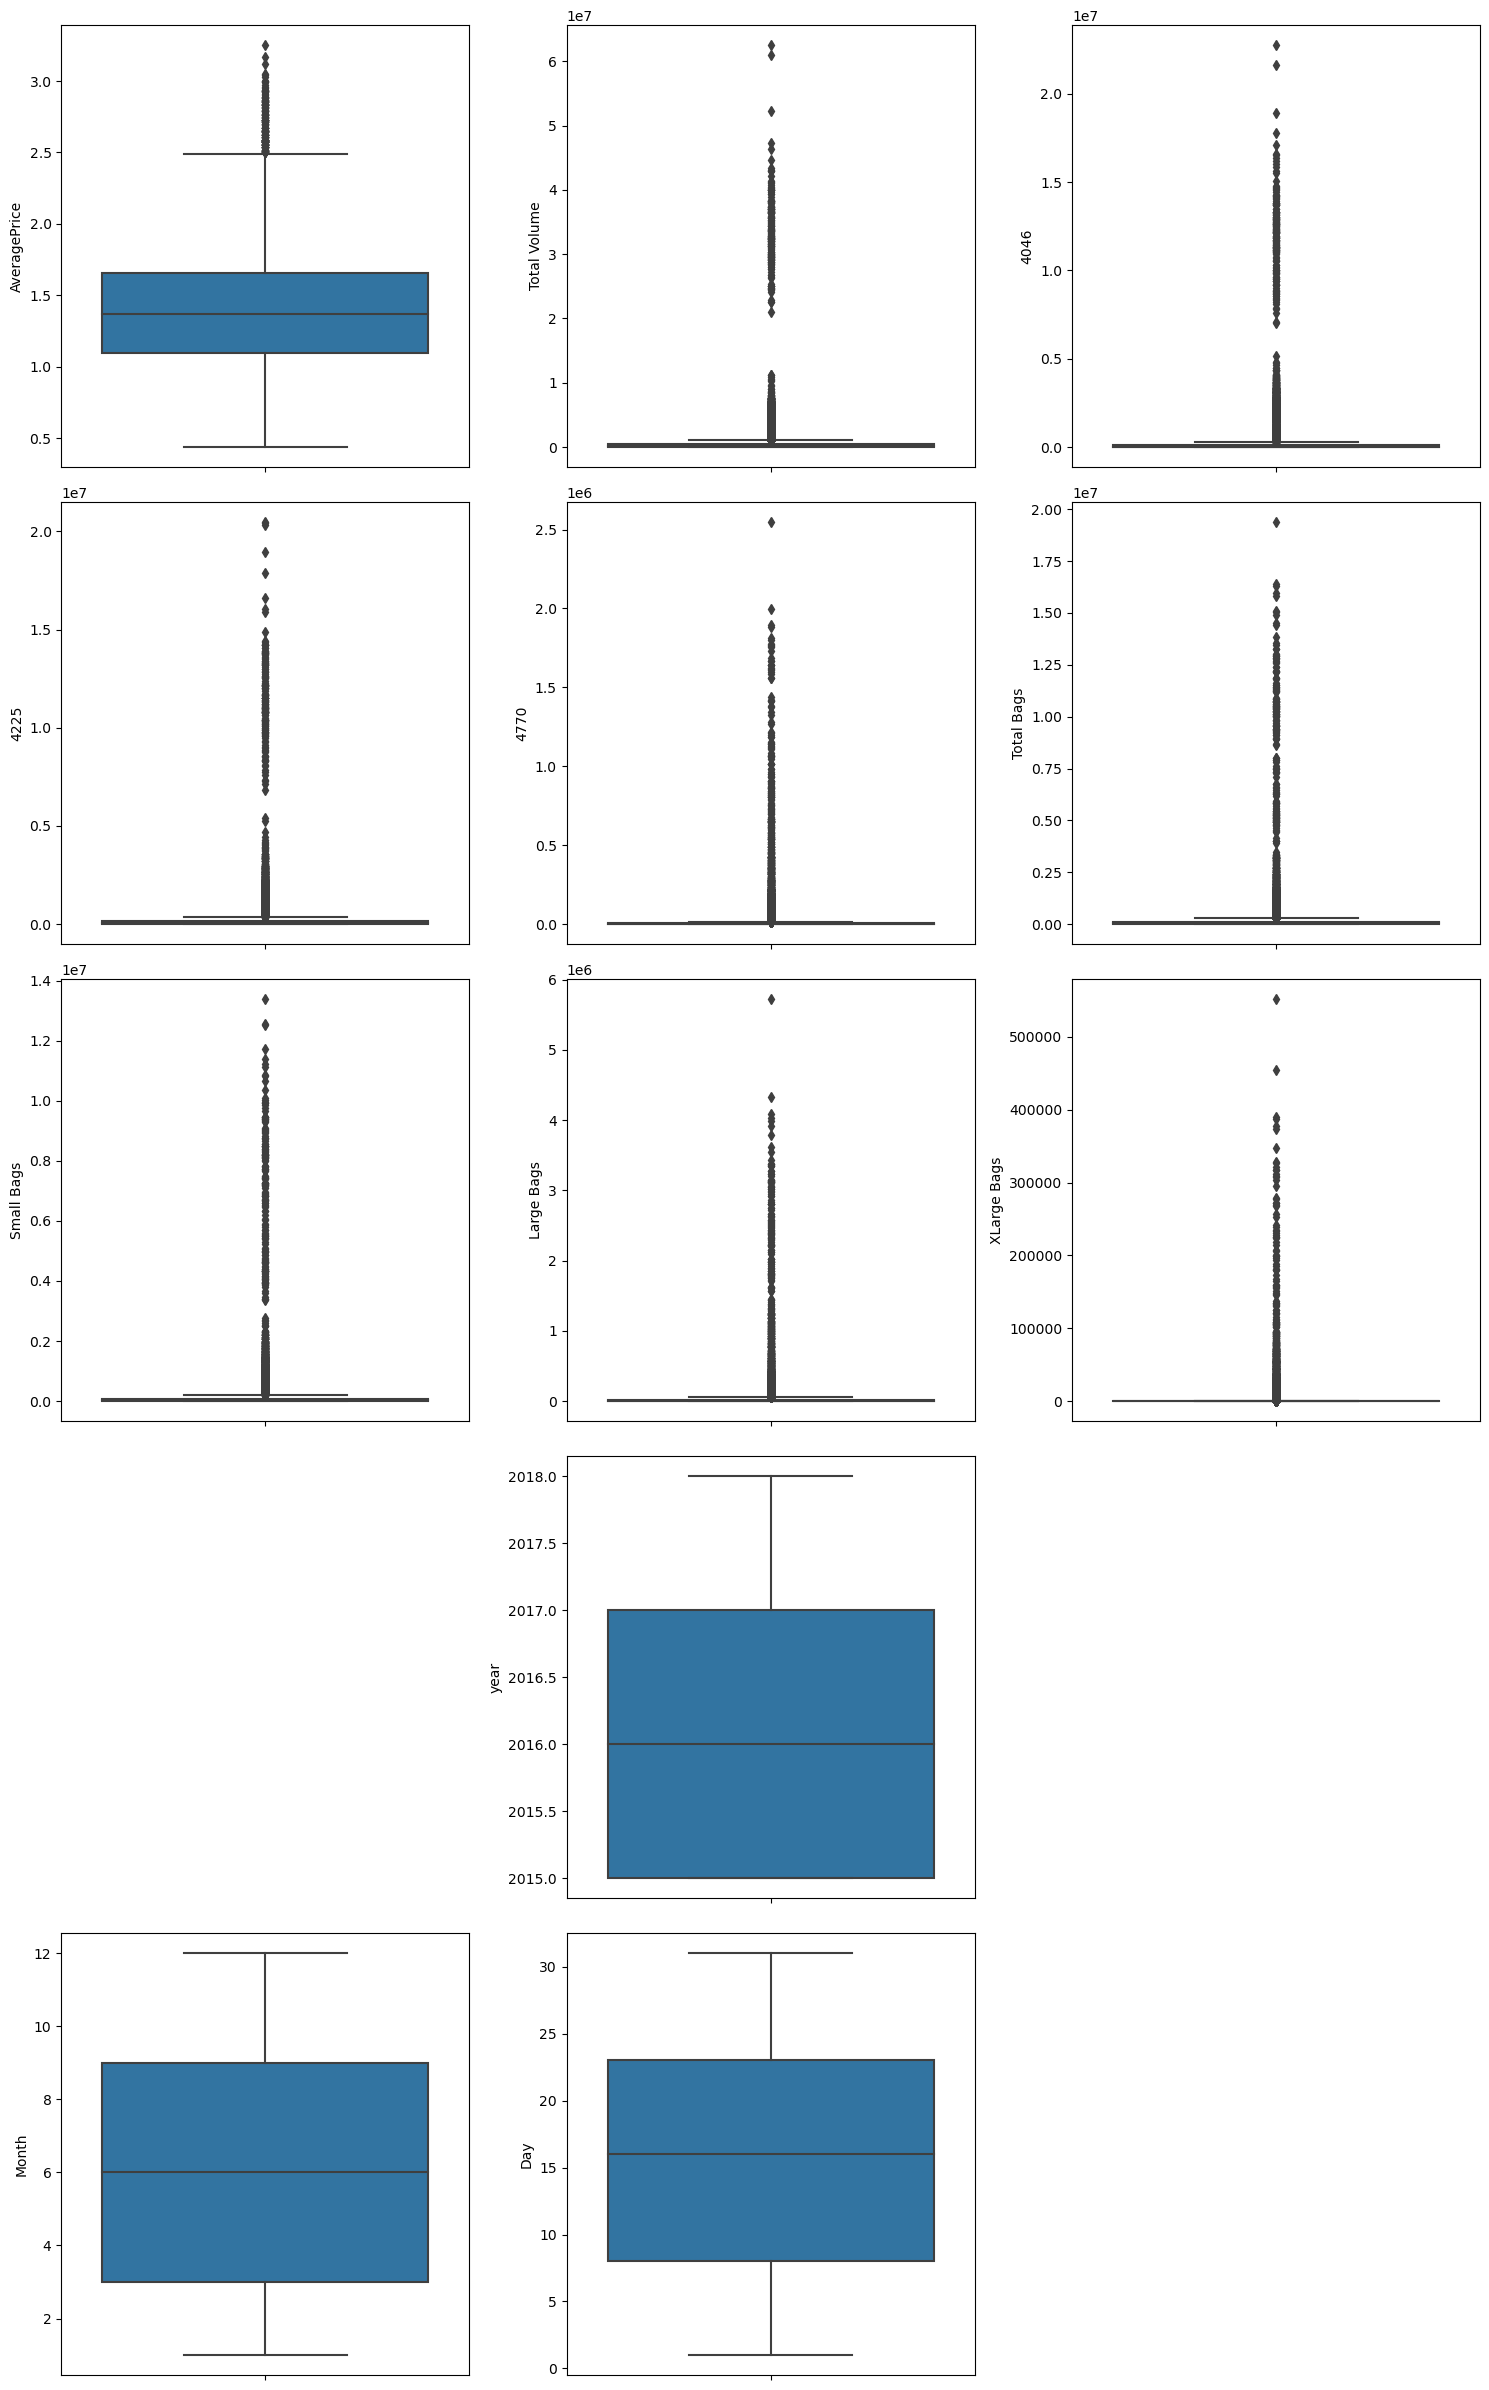

In [78]:
plt.figure(figsize=(15,24))
for num,i in enumerate(dfc.columns):
    if dfc[i].dtype in ['int64', 'float64']:
        plt.subplot(5,3,num+1)
        sns.boxplot(y=dfc[i])
        plt.ylabel(i)
plt.tight_layout()
plt.show()

#### There is skewness in many columns but since the data is authentic coming from actual retailers and is said to be accurate hence i have decided not to drop the outliers as it may contain important anomalies in the data. Looking at the accuracy score and r2 scores we can later treat it if necessary.

In [42]:
cat_cols=[col for col in dfc.columns if dfc[col].dtypes=='O']
num_cols=[col for col in dfc.columns if dfc[col].dtypes!='O']
#Seperating the numerical columns and categorical columns

In [43]:
cat_cols

['type', 'region']

In [44]:
num_cols

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'year',
 'Month',
 'Day']

In [37]:
dfc['type'].value_counts()
# Type column has balanced categories

conventional    9126
organic         9123
Name: type, dtype: int64

In [45]:
dfc['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [57]:
dfc.isnull().sum().sum()
# There are 0 null values in the dataset

0

In [257]:
x=dfc.drop('region',axis=1)
x.head(1)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,12,27


In [258]:
y=dfc['region']
y.head()

0    Albany
1    Albany
2    Albany
3    Albany
4    Albany
Name: region, dtype: object

### Above i have splitted the data into x and y with y being the Region column

In [274]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
#Splitting x into train and test sets

In [259]:
x_train.head(1)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
10353,1.51,2285.46,3.69,1340.14,0.0,941.63,438.45,503.18,0.0,organic,2015,5,24


In [55]:
y_train.head()

16391          Orlando
4990          SanDiego
13653    PhoenixTucson
2074           Roanoke
12377          Chicago
Name: region, dtype: object

In [61]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14599 entries, 16391 to 15795
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  14599 non-null  float64
 1   Total Volume  14599 non-null  float64
 2   4046          14599 non-null  float64
 3   4225          14599 non-null  float64
 4   4770          14599 non-null  float64
 5   Total Bags    14599 non-null  float64
 6   Small Bags    14599 non-null  float64
 7   Large Bags    14599 non-null  float64
 8   XLarge Bags   14599 non-null  float64
 9   type          14599 non-null  object 
 10  year          14599 non-null  int64  
 11  Month         14599 non-null  int64  
 12  Day           14599 non-null  int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 1.6+ MB


In [40]:
# Creating instance for One hot encoder and standard scaler
ohe=OneHotEncoder()
scaler=StandardScaler()

In [264]:

transform=ColumnTransformer(transformers=[
    ('OneHotEncoder',ohe,[9]),
    ('scaler',scaler,slice(0,9)),
],remainder='passthrough')

Using column transformer to define the transformation steps. Here we will be performing onehotencoding on the type column(index=9) and then standard scaler on all numerical columns from index 0 till index 8(8 included).

In [265]:
pipe=Pipeline(steps=[
    ('Preprocessor',transform) ,
    ('model',RandomForestClassifier())
])

In the above line we have created a pipeline with 2 steps.First we are calling the transformer('transform') to process steps inside it and then we will be calling the model. In this case a dummy model RandomForestClassifier is created.

In [266]:
params=[
    { 
    'model':[RandomForestClassifier()],
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    #'model__min_samples_leaf': [1, 2, 4],
    #'model__bootstrap': [True, False]
    },
   {
    'model':[GradientBoostingClassifier()]
    #'model__n_estimators': [100, 200, 300],
   # 'model__learning_rate': [0.01, 0.1, 0.2]
    #'model__max_depth': [3, 5, 7]
    #'model__min_samples_split': [2, 5, 10]
    },
    {

    'model':[SVC()]
    #'model__C': [0.1, 1, 10, 100],
    #'model__kernel': ['linear', 'rbf', 'poly']
    #'model__gamma': ['scale', 'auto']
    },
    {

    'model':[LogisticRegression()],
    #'model__C': [0.01, 0.1, 1],
    #'model__max_iter': [100, 200, 300]
    }
]

The above parameter grid was made with an objective to use it in gridsearchcv in order to evaluate multiple classification models simultaneaously along with their parameters and produce the result giving the best model and its best parameters. However my laptop was taking a very long time to evaluate all the models simultaneously with their parameters, hence i first commented '#' all parameters of all models and only evaluated the models with whatever their default Parameters were. This gave me the result that RandomForestClassifier was the best performing model with an accuracy score of 88.7%. Later i again commented on all models with their parameters and only used RandomForestClassifier() along with its parameters and got the best_params_ result and accuracy score as shown below.

Creating an instance of gridsearchcv and passing the pipeline('pipe') and parameter grid 'params' with a 5 split cross validation and scoring selected as accuracy
gscv=GridSearchCV(pipe,params,cv=5,scoring='accuracy')

In [268]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocessor',
                                        ColumnTransformer(transformers=[('OneHotEncoder',
                                                                         OneHotEncoder(),
                                                                         [9]),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         slice(0, 9, None))])),
                                       ('model', RandomForestClassifier())]),
             param_grid=[{'model': [RandomForestClassifier(n_estimators=300)],
                          'model__max_depth': [None, 10, 20],
                          'model__min_samples_split': [2, 5],
                          'model__n_estimators': [100, 200, 300]}],
             scoring='accuracy')

In [275]:
gscv.best_params_

{'model': RandomForestClassifier(n_estimators=300),
 'model__max_depth': None,
 'model__min_samples_split': 2,
 'model__n_estimators': 300}

In [276]:
gscv.best_score_

0.8897179086476417

In [277]:
classifier=gscv.best_estimator_ #created instance of the best model and parameters from gridsearchcv

In [278]:
predregion=classifier.predict(x_test) # storing predictions of x_test in predregion

In [279]:
accuracy_score(y_test,predregion) # A good accuracy score suggesting the parameter is performing extremely well

0.9797260273972602

In [280]:
report = classification_report(y_test, predregion, output_dict=True)
report_df = pd.DataFrame(report).transpose()

In [281]:
report_df # Classification report suggesting at all classes are being predicted well with an accuracy between 94% to 100%

,precision,recall,f1-score,support
Albany,1.000000,0.984127,0.992000,63.000000
Atlanta,0.985915,0.958904,0.972222,73.000000
BaltimoreWashington,0.968254,1.000000,0.983871,61.000000
Boise,0.972973,1.000000,0.986301,72.000000
Boston,0.956522,0.985075,0.970588,67.000000
BuffaloRochester,0.958904,0.958904,0.958904,73.000000
California,1.000000,1.000000,1.000000,62.000000
Charlotte,0.986301,0.947368,0.966443,76.000000
Chicago,1.000000,1.000000,1.000000,72.000000
CincinnatiDayton,0.969231,0.969231,0.969231,65.000000


In [512]:
newd=x.iloc[0:4] # Extracting a new set of data from x i.e the first 4 rows

In [514]:
newd

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,12,6


In [513]:
print('The predicted values for region are : ',classifier.predict(newd)) 
print('The actual values for region are : ',y[0:4].values)

The predicted values for region are :  ['Albany' 'Albany' 'Albany' 'Albany']
The actual values for region are :  ['Albany' 'Albany' 'Albany' 'Albany']


## The new data provided above is from the 0th to 3rd index and it is being predicted accurately by the model

# Predicting cost of avocados

In [283]:
#Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [285]:
dfc.head(1)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27


In [286]:
x1=dfc.drop('AveragePrice',axis=1)

In [287]:
y1=dfc['AveragePrice']

Seprated the x and y labels. The y label this time is Average Price.

In [351]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.20,random_state=41)
# Splitting the dataset into train and test

In [352]:
# Providing the model grid for evaluating best performing model with default parameters
param_grid = [
    {
        'model': [LinearRegression()]    
    },
    {
        'model': [RandomForestRegressor()]
    },
    {
        'model': [SVR()]   
    },
    {
        'model': [GradientBoostingRegressor()]  
    },
    {
        'model': [Ridge()],
    }
]

In [353]:
x1_train.head(1)

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
10353,2285.46,3.69,1340.14,0.0,941.63,438.45,503.18,0.0,organic,2015,Louisville,5,24


In [354]:
#Creating a new instance of a new ColumnTranformer
transform2=ColumnTransformer(transformers=[
    ('OneHotEncoder',ohe,[8,10]),
    ('scaler',scaler,slice(0,8)),
],remainder='passthrough')

Created the columntransformer. This time performing OheHotEncoder on type and region columns and standar scaler on all other numerical columns

In [355]:
#Creating pipe2 as the new Pipeline that executes the steps from transform2 and adds dummy model as LinearRegression
pipe2=Pipeline(steps=[
    ('Preprocessor',transform2) ,
    ('model',LinearRegression())
])

In [356]:
#creating instance of gridsearch cv that takes pip2 as the estimator and param_grid as the parameters for hyperparameter tuning
gsrch=GridSearchCV(pipe2,param_grid,cv=5,scoring='neg_mean_squared_error')

In [357]:
gsrch.fit(x1_train,y1_train) #Fitting the best model from gridsearchcv to the training data

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OneHotEncoder',
                                                                         OneHotEncoder(),
                                                                         [8,
                                                                          10]),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         slice(0, 8, None))])),
                                       ('model', LinearRegression())]),
             param_grid=[{'model': [LinearRegression()]},
                         {'model': [RandomForestRegressor()]},
                         {'model': [SVR()]},
                         {'model': [GradientBoostingRegressor()]},
                         {'model': [Ridge()]}],
             scoring='neg_mean_squared_error')

In [358]:
 gsrch.best_params_ # Random forest regressor is selected as the best performing model

{'model': RandomForestRegressor()}

In [359]:
gsrch.best_score_ # A score of 0.017 suggests that there is very little variance 

-0.017379807228288444

In [360]:
gsrch.best_estimator_

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(), [8, 10]),
                                                 ('scaler', StandardScaler(),
                                                  slice(0, 8, None))])),
                ('model', RandomForestRegressor())])

In [361]:
rf=RandomForestRegressor() #creating instance of random forest regressor named rf

In [487]:
param_grid_rf = {'CL': [RandomForestRegressor()],
 'CL__max_depth': [None],
 'CL__min_samples_split': [2],
 'CL__n_estimators': [100]
                } # arrived at these parameters after trying many combinations

In [488]:
pipe3=Pipeline(steps=[
    ('Preprocessor',transform2) ,
    ('CL',RandomForestRegressor())
]) #New final pipeline for rf

In [489]:
# Final gridsearch instance created passing the new pipeline and hyperparameter grid also using verbose to see the executing
newgs=GridSearchCV(estimator=pipe3,param_grid=param_grid_rf,cv=3,scoring='r2',verbose=2)

In [490]:
newgs.fit(x1_train,y1_train) # fitting training data

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END CL=RandomForestRegressor(), CL__max_depth=None, CL__min_samples_split=2, CL__n_estimators=100; total time=  28.0s
[CV] END CL=RandomForestRegressor(), CL__max_depth=None, CL__min_samples_split=2, CL__n_estimators=100; total time=  30.0s
[CV] END CL=RandomForestRegressor(), CL__max_depth=None, CL__min_samples_split=2, CL__n_estimators=100; total time=  31.8s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('Preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OneHotEncoder',
                                                                         OneHotEncoder(),
                                                                         [8,
                                                                          10]),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         slice(0, 8, None))])),
                                       ('CL', RandomForestRegressor())]),
             param_grid={'CL': [RandomForestRegressor()],
                         'CL__max_depth': [None], 'CL__min_samples_split': [2],
                         'CL__n_estimators': [100]},
             scoring='r2', verbose=2)

In [491]:
newgs.best_params_

{'CL': RandomForestRegressor(),
 'CL__max_depth': None,
 'CL__min_samples_split': 2,
 'CL__n_estimators': 100}

In [492]:
newgs.best_score_

0.8799076535884479

In [ ]:
# these 2 parameters set were chosen after trying many combinations of which i finally selected the second set
First set parameters: 
best_params_ =    
{'CL': RandomForestRegressor(max_depth=10, min_samples_split=3, n_estimators=200),
 'CL__max_depth': 10,
 'CL__min_samples_split': 3,
 'CL__n_estimators': 200} - 
best_score_ =0.83


Second set parameters: 
best_params_ =
{'CL': RandomForestRegressor(),
 'CL__max_depth': None,
 'CL__min_samples_split': 2,
 'CL__n_estimators': 100} 
best_score_ =0.91


In [493]:
p=newgs.predict(x1_test) #predicting test data

In [494]:
r2_score(y1_test,p) #checking r2 score for predicted vs actual values

0.911931241902136

In [495]:
rf=newgs.best_estimator_ # Storing the model with best parameters in variable rf

In [500]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.20,random_state=41)
# Changing the random state to achieve maximum accuracy

In [501]:
rf.fit(x1_train,y1_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(), [8, 10]),
                                                 ('scaler', StandardScaler(),
                                                  slice(0, 8, None))])),
                ('CL', RandomForestRegressor())])

In [502]:
prd=rf.predict(x1_test)

In [503]:
r2_score(y1_test,prd) # The r2 score is good.

0.9118991487974041

In [507]:
newdata=x1.iloc[0:4]

In [510]:
print('The predicted average cost for newdata are : ',rf.predict(newdata))
print('The actual values for newdata are : ',y1[0:4].values)
# checking the values for predicted against the actuals

The predicted average cost for newdata are :  [1.2981 1.3183 0.9767 1.094 ]
The actual values for newdata are :  [1.33 1.35 0.93 1.08]


## Hence prediction are very close to actuals and the model is performing well

1) Best model for predicting Region is Random Forest Classifier with a 97.97% accuracy and its best parameters are as follows:
   
    {'model': RandomForestClassifier(),
     'model__max_depth': None,
     'model__min_samples_split': 2,
     'model__n_estimators': 300}
    
2) The best model for predicting Cost of avocados is Random Forest Regressor with an r2 score of 91.18%. Its best parameters are as follows:
    
     {'CL': RandomForestRegressor(),
     'CL__max_depth': None,
     'CL__min_samples_split': 2,
     'CL__n_estimators': 100 }

